# Pre-processing Misc

## General

In [1]:
__author__ = 'BruceCottman'
__author__

'BruceCottman'

## imports

In [1]:
import pandas as pd
import copy, random
import numpy as np
from numba import jit
from tqdm import tqdm
from glob import glob
import string as str

In [2]:
import os,sys
sys.path.append(os.path.abspath('../'))
sys.path

['',
 '/Users/brucecottman/anaconda3/envs/steppy/lib/python36.zip',
 '/Users/brucecottman/anaconda3/envs/steppy/lib/python3.6',
 '/Users/brucecottman/anaconda3/envs/steppy/lib/python3.6/lib-dynload',
 '/Users/brucecottman/.local/lib/python3.6/site-packages',
 '/Users/brucecottman/anaconda3/envs/steppy/lib/python3.6/site-packages',
 '/Users/brucecottman/anaconda3/envs/steppy/lib/python3.6/site-packages/aeosa',
 '/Users/brucecottman/anaconda3/envs/steppy/lib/python3.6/site-packages/pip-18.0-py3.6.egg',
 '/Users/brucecottman/anaconda3/envs/steppy/lib/python3.6/site-packages/IPython/extensions',
 '/Users/brucecottman/.ipython',
 '/Users/brucecottman/Documents/PROJECTS/steppy-toolkit']

In [3]:
from steppy.base import Step, BaseTransformer, make_transformer
from steppy.adapter import Adapter, E
from steppy.utils import get_logger
import joblib

In [5]:
from toolkit.preprocessing.S_Scalers import __ScalerDict__


Level	Numeric value
-   CRITICAL	50
-    ERROR	40
-    WARNING	30
-    INFO	20
-    DEBUG	10
-    NOTSET	0

In [6]:
logger = get_logger()

In [11]:
logger.setLevel('DEBUG'.upper())
logger.getEffectiveLevel()

10

In [7]:
from __future__ import print_function
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm
import probscale
import seaborn as sns
from scipy.stats import probplot
import statsmodels.api as sm

%reload_ext autoreload
%autoreload 2
%matplotlib inline
import matplotli

/Users/brucecottman/anaconda3/envs/steppy/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/brucecottman/anaconda3/envs/steppy/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [ ]:
!conda list

## Input  Datasets

Continuous features can exhibit a wide range of distributional characteristics, including near-Gaussian, strongly asymmetric, light- or heavy-tailed, multi-moda

Catagorical features  can be  either ordered, or unordered. Catagorical features are not covered here.

### Boston Dataset

In [13]:
from sklearn.datasets import load_boston
boston = load_boston()

logger.info(boston.feature_names)
logger.info(boston.DESCR)
City = pd.DataFrame(boston.data, columns = boston.feature_names )
City = City[['CRIM', 'INDUS','NOX','TAX','B']]
City['MEDV'] = boston.target
logger.info(City.shape)
logger.info(City.columns)

2018-08-21 17:34:25 steppy >>> ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
2018-08-21 17:34:25 steppy >>> Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index 

A dataset that illustrates the range of distributional behavior is the Boston Boston dataframe.  This dataframe includes 14 numerical variables that characterize 506 suburban housing tracts in the Boston area: 12 of these variables have class “numeric” and the remaining two have class “integer”.  

-  the distribution of crim is very asymmetric with an extremely heavy right tail;
- the distribution of lstat is also clearly asymmetric but far less so;
- the distribution of rm appears to be almost Gaussian; 
- the distribution of zn appears to be tri-modal, mostly concentrated around zero, but with clear secondary peaks at around 20 and 80.

### Housing Dataset

- Feature 0 (median income in a block) and feature 5 (number of households) of
the `California housing dataset
<http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html>`_ have very
different scales and contain some very large outliers. These two
characteristics lead to difficulties to visualize the data and, more
importantly, they can degrade the predictive performance of many machine
learning algorithms. Unscaled data can also slow down or even prevent the
convergence of many gradient-based estimators.
- Indeed many estimators are designed with the assumption that each feature takes
values close to zero or more importantly that all features vary on comparable
scales. In particular, metric-based and gradient-based estimators often assume
approximately standardized data (centered features with unit variances). A
notable exception are decision tree-based estimators that are robust to
arbitrary scaling of the data.

In [14]:
from sklearn.datasets import fetch_california_housing
print(__doc__)
dataset = fetch_california_housing()
X_full, y_full = dataset.data, dataset.target

# Take only 2 features to make visualization easier
# Feature of 0 has a long tail distribution.
# Feature 5 has a few but very large outliers.
logger.info(dataset.data.shape)
logger.info(dataset.feature_names)
logger.info(dataset.DESCR) 
Housing = pd.DataFrame(dataset.data, columns = dataset.feature_names )
Housing = Housing[['MedInc', 'HouseAge', 'AveRooms'
                   , 'AveBedrms', 'Population', 'AveOccup']]
logger.info(Housing.shape)
logger.info(Housing.columns)

Automatically created module for IPython interactive environment
2018-08-21 17:34:25 steppy >>> (20640, 8)
2018-08-21 17:34:25 steppy >>> ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
2018-08-21 17:34:25 steppy >>> California housing dataset.

The original database is available from StatLib

    http://lib.stat.cmu.edu/datasets/

The data contains 20,640 observations on 9 variables.

This dataset contains the average house value as target variable
and the following input variables (features): average income,
housing average age, average rooms, average bedrooms, population,
average occupation, latitude, and longitude in that order.

References
----------

Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,
Statistics and Probability Letters, 33 (1997) 291-297.


2018-08-21 17:34:25 steppy >>> (20640, 6)
2018-08-21 17:34:25 steppy >>> Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup'],


### Hip_m Dataset

In [15]:
hip_m=np.genfromtxt('HIP_MEN_chr_pos_rs_pval.txt', dtype=None)
hip_m= pd.DataFrame(hip_m[['f0','f1','f2','f3']])
Hip_m= hip_m
hip_m= hip_m[['f1','f3']]
logger.info(hip_m.shape)
logger.info(hip_m.head())

/Users/brucecottman/anaconda3/envs/steppy/lib/python3.6/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  """Entry point for launching an IPython kernel.


2018-08-21 17:34:59 steppy >>> (2724987, 2)
2018-08-21 17:34:59 steppy >>>          f1    f3
0   9918166  0.31
1   9918296  0.31
2  98252982  0.28
3  98253133  0.36
4  98253681  0.65


## Plot Distribution Defintions

### SeabornFig2Grid

In [17]:
import matplotlib.gridspec as gridspec

class SeabornFig2Grid():

    def __init__(self, seaborngrid, fig,  subplot_spec):
        self.fig = fig
        self.sg = seaborngrid
        self.subplot = subplot_spec
        if isinstance(self.sg, sns.axisgrid.FacetGrid) or \
            isinstance(self.sg, sns.axisgrid.PairGrid):
            self._movegrid()
        elif isinstance(self.sg, sns.axisgrid.JointGrid):
            self._movejointgrid()
        self._finalize()

    def _movegrid(self):
        """ Move PairGrid or Facetgrid """
        self._resize()
        n = self.sg.axes.shape[0]
        m = self.sg.axes.shape[1]
        self.subgrid = gridspec.GridSpecFromSubplotSpec(n,m, subplot_spec=self.subplot)
        for i in range(n):
            for j in range(m):
                self._moveaxes(self.sg.axes[i,j], self.subgrid[i,j])

    def _movejointgrid(self):
        """ Move Jointgrid """
        h= self.sg.ax_joint.get_position().height
        h2= self.sg.ax_marg_x.get_position().height
        r = int(np.round(h/h2))
        self._resize()
        self.subgrid = gridspec.GridSpecFromSubplotSpec(r+1,r+1, subplot_spec=self.subplot)

        self._moveaxes(self.sg.ax_joint, self.subgrid[1:, :-1])
        self._moveaxes(self.sg.ax_marg_x, self.subgrid[0, :-1])
        self._moveaxes(self.sg.ax_marg_y, self.subgrid[1:, -1])

    def _moveaxes(self, ax, gs):
        #https://stackoverflow.com/a/46906599/4124317
        ax.remove()
        ax.figure=self.fig
        self.fig.axes.append(ax)
        self.fig.add_axes(ax)
        ax._subplotspec = gs
        ax.set_position(gs.get_position(self.fig))
        ax.set_subplotspec(gs)

    def _finalize(self):
        plt.close(self.sg.fig)
        self.fig.canvas.mpl_connect("resize_event", self._resize)
        self.fig.canvas.draw()

    def _resize(self, evt=None):
        self.sg.fig.set_size_inches(self.fig.get_size_inches())

/Users/brucecottman/anaconda3/envs/steppy/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


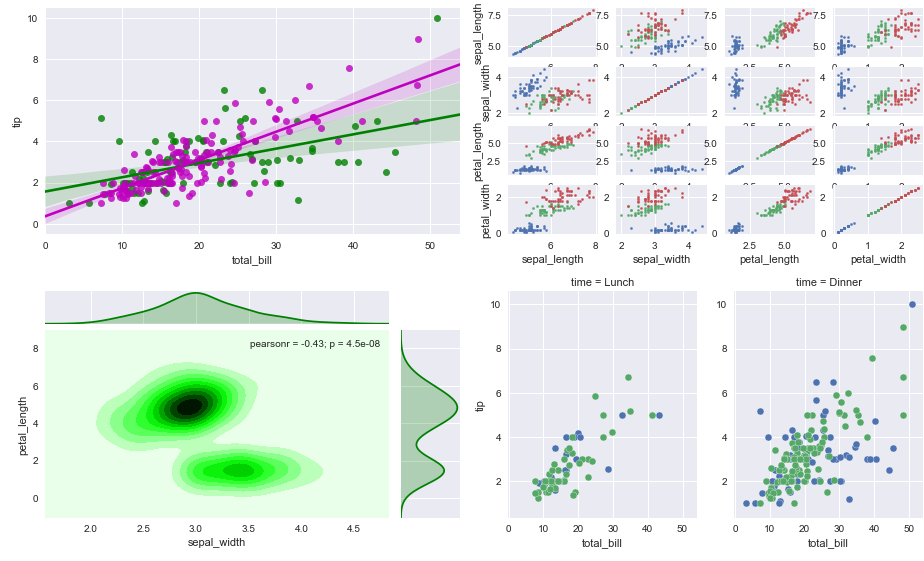

In [18]:
#import SeabornFig2Grid as sfg


sns.set()

iris = sns.load_dataset("iris")
tips = sns.load_dataset("tips")

# An lmplot
g0 = sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips, 
                palette=dict(Yes="g", No="m"))
# A PairGrid
g1 = sns.PairGrid(iris, hue="species")
g1.map(plt.scatter, s=5)
# A FacetGrid
g2 = sns.FacetGrid(tips, col="time",  hue="smoker")
g2.map(plt.scatter, "total_bill", "tip", edgecolor="w")
# A JointGrid
g3 = sns.jointplot("sepal_width", "petal_length", data=iris,
                   kind="kde", space=0, color="g")


fig = plt.figure(figsize=(13,8))
gs = gridspec.GridSpec(2, 2)

mg0 = SeabornFig2Grid(g0, fig, gs[0])
mg1 = SeabornFig2Grid(g1, fig, gs[1])
mg2 = SeabornFig2Grid(g2, fig, gs[3])
mg3 = SeabornFig2Grid(g3, fig, gs[2])

gs.tight_layout(fig)
#gs.update(top=0.7)

plt.show()


/Users/brucecottman/anaconda3/envs/steppy/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


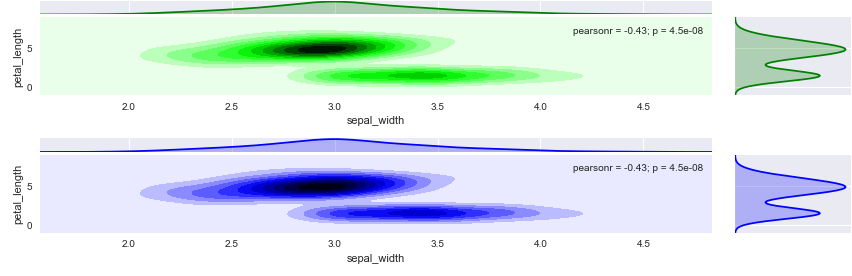

In [19]:
sns.set()

iris = sns.load_dataset("iris")
tips = sns.load_dataset("tips")

g2 = sns.jointplot("sepal_width", "petal_length", data=iris,
                   kind="kde", space=0, color="g")
g3 = sns.jointplot("sepal_width", "petal_length", data=iris,
                   kind="kde", space=0, color="b")


fig = plt.figure(figsize=(4*3,4))
gs = gridspec.GridSpec(2, 1)

#mg0 = SeabornFig2Grid(g0, fig, gs[0])
#mg1 = SeabornFig2Grid(g1, fig, gs[1])
#mg2 = SeabornFig2Grid(g2, fig, gs[3])
mg0 = SeabornFig2Grid(g2, fig, gs[0])
mg1 = SeabornFig2Grid(g3, fig, gs[1])
#mg2 = SeabornFig2Grid(g3, fig, gs[2])
gs.tight_layout(fig)
#gs.update(top=0.7)

plt.show()

### ppqqp_plot

In [20]:
def ppqqp_plot(X,name,sze=100,dist=None):
    '''
    3 plots 
    1. Percentile, a.k.a. P-P plot
    2 .Quantile, a.k.a. Q-Q plot (normal distribution)
    3. Probability, a.k.a. Prob Plot
    quick and dirty no numpy or other dist checking
    - X must be a pandas series
    - name: label name
    - size: (default: 100) is sample size of X 
    - dist: (default: none)  When using quantile or probability scales,
    you can pass a distribution from the scipy.stats module
    to the probplot function. When a distribution is not provided 
    to the dist parameter, a standard normal distribution is used.
    - return: boolean of sucess
    '''

    logger.debug('ppqqp_plot:')        
    if not ((X.dtype == np.int) or (X.dtype == np.float)):
        # not numeric
        logger.error('ppqqp was passed a distrubtion not numeric but of type: {})'.format(X.dtype))
        return(False)
    if type(X) == np.ndarray:
        if len(X) > sze: X = np.random.choice(X,sze)
    elif type(X) == pd.core.series.Series:
        if len(X) > sze: X = X.sample(sze)
    else:
        logger.error('ppqqp was passed a distrubtion not numeric but of type: {})'.format(X.dtype))
        return(False)
    ax = [0,1,3]
    fig, (ax[0], ax[1],ax[2]) = plt.subplots(figsize=(12, 4), ncols=3)
    gp = probscale.probplot(X, ax=ax[0], plottype='pp', bestfit=True,
                             problabel='Percentile', datalabel=name,
                             scatter_kws=dict(label=name),
                             line_kws=dict(label='Best Fit line'))
    fig = probscale.probplot(X, ax=ax[1], plottype='qq', bestfit=True, dist=dist,
                             problabel='Standard Normal Quantiles', datalabel=name,
                             scatter_kws=dict(label=name),
                             line_kws=dict(label='Normal QQ line'))
    fig = probscale.probplot(X, ax=ax[2], plottype='prob', bestfit=True,dist=dist,
                             problabel='Standard Normal Probalities', datalabel=name,
                             scatter_kws=dict(label=name),
                             line_kws=dict(label='Normal Probalities line'))
    ax[0].legend(loc='upper left');ax[1].legend(loc='upper left');ax[2].legend(loc='upper left')
    return(True)

### dualplot

In [21]:
def dualplot(dist,ytest):
    logger.debug('dualplot:')
    df = pd.DataFrame({'theory': dist,'actual': ytest})
    fig = plt.figure(figsize=(4,4))
    gp = sns.jointplot('actual', 'theory', df, stat_func=None, kind='hex')
    return(gp)

### Plot_Distribution_c

In [22]:
#side effect is a plot, nothing to save
# no state to save
#maybe save plot in (or X) in future version
from matplotlib import colors as mcolors

class Plot_Distribution_c(BaseTransformer):
    def __init__(self,label='',dist_name=''
                 ,title='Distribution',*args,**kwargs):
        super().__init__()
        self.title = title
        self.label = label
        self.dist_name = dist_name
        self.color_list = list(mcolors.CSS4_COLORS.keys())[51:100]
    
    def fit(self, X_o,X):
        logger.debug('Plot_Distribution_c fit:')
        return self

# X_o: orginal
# X ->  X = f(X_o)
    def transform(self, X_o,X):
        logger.debug('Plot_Distribution_c transform:')
        for feat in list(X_o.columns):  # assume df,fix later
            vth = list(X_o.columns).index(feat)
            self.dist_name = ' '+feat
            dualplot(X_o[feat],X[:,vth])
            ppqqp_plot(X[:,vth],self.label+self.dist_name)
        return self
    
    def fit_transform(self, X_o,X):
        return((self.fit(X_o,X)).transform(X_o,X))

    def load(self, filepath):
        return self

    def persist(self, filepath):
        pass

### fooplot definitions

In [23]:
def fooplot(dnames,scaler_list,size):

    for dname,args in dnames:
        for scalar in scaler_list:
            logger.debug('{}  {}:    {} '.format(scalar,args,dname))
            if args == 'none': 
                dist = StatDistributionDict[dname](size=size)
            else: 
                dist = StatDistributionDict[dname](*args,size=size)
            try: 
                gp = [0,1,2,3]
                sns.set()
                ytest = __ScalerDict__[scalar]().fit_transform(dist[:,np.newaxis])
                gp0 = dualplot(dist,ytest)
                ppqqp_plot(ytest,scalar+' '+ dname)
            except: pass
            plt.show()

In [24]:
def fooplot2(df,dnames,scaler_list,size):
    for dname in dnames:
        for scalar in scaler_list:
            try:
                dist = df[dname].values
                ytest = __ScalerDict__[scalar]().fit_transform(dist[:,np.newaxis])
                dualplot(dist,ytest)
                ppqqp_plot(ytest,scalar+dname)
            except: pass


#### Standard Distibutions

In [11]:
import scipy
StatDistributionDict = {}

for nth,d in enumerate(scipy.stats.__all__):
    try:
        StatDistributionDict[d] = eval('scipy.stats.'+d+'.rvs')
    except: pass

In [24]:
# change this to dtermine siza/lenth of Gamma_Dist
size = 100000
dist = StatDistributionDict['gamma'](1.0,size=size)
Gamma_Dist = pd.DataFrame({'Gamma': dist})
display(Gamma_Dist.shape)
display(Gamma_Dist.head(n=2))

(100000, 1)

,Gamma
0,0.432566
1,0.022471


In [25]:
# statiscal distribution with parameters
dnames = [['beta',[2.0,1.0]],['alpha',[0.75]]
          ,['uniform','none'],['cauchy','none']
          ,['ksone',[1000]],['boltzmann',[1.4, 19]]
          ,['laplace',[3.0]],['tukeylambda',[3.0]]
          ,['dweibull',[3.0]],['chi2',[3.0]]
          ,['exponnorm',[1]],['norm','none']]
dnames

[['beta', [2.0, 1.0]],
 ['alpha', [0.75]],
 ['uniform', 'none'],
 ['cauchy', 'none'],
 ['ksone', [1000]],
 ['boltzmann', [1.4, 19]],
 ['laplace', [3.0]],
 ['tukeylambda', [3.0]],
 ['dweibull', [3.0]],
 ['chi2', [3.0]],
 ['exponnorm', [1]],
 ['norm', 'none']]

#### Housing

In [29]:
df = Housing
dnames = list(df.columns)
scaler_list = ['BoxCoxScaler','LambertScaler'
               ,'StandardScaler','MinMaxScaler']
size = 10000

fooplot2(df,dnames,scaler_list,size)

- every transform has problems last bin of HOUSEAGE. This last could be a clip, which could be modeled as same distbution with a width of 50 (parmeterize year extension number) An experiment for another day
- MINMAX probably does best on AVGBEDRMS at transforming into Gaussian
- BOOXCOX does well on AVEROCCUP!!!!!

#### City

In [30]:
df = City
dnames = list(df.columns)

scaler_list = ['BoxCoxScaler','LambertScaler'
               ,'StandardScaler','MinMaxScaler']

size = 10000

fooplot2(df,dnames,scaler_list,size)

- 'BoxCoxScaler','LambertScaler' do best on the continuous features

#### Hip male

In [31]:
df = hip_m
dnames = list(df.columns)

scaler_list = ['BoxCoxScaler','LambertScaler'
               'StandardScaler','MinMaxScaler']

size = 10000

fooplot2(df,dnames,scaler_list,size)

/Users/brucecottman/anaconda3/envs/steppy/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


- BoxCox is better than Lambert at transforming into Gaussian (halfgennorm,chisq
- - wont work on negative values (Cauchy,laplace
- Lambert is best at bringing right or left tails towards center (by about 2 or more stds) and best at not-perturbing (changing) balanced distributions (uniform,dweibull)
- although Standard and Robust are even better at not-perturbing any distribution

- use BoxCox to transform to Gaussian
- use Lambert for distributions with outliers to transform to more centered (less skewnn)
- use Standard to put any feature on a standard scale

#  Steps

## Adaptors

In [32]:
MODELS_DIR = '../input/models'
EXPERIMENT_DIR = MODELS_DIR+'/tmp'
!mkdir $MODELS_DIR
!mkdir $EXPERIMENT_DIR
import shutil

# By default pipelines will try to load previously trained models so we delete the cache to ba sure we're starting from scratch
shutil.rmtree(EXPERIMENT_DIR, ignore_errors=True)


mkdir: ../input/models: File exists
mkdir: ../input/models/tmp: File exists


In [33]:
some_other_bound_variable = 0
Gamma_Dist = Gamma_Dist_o
data_Housing = {
    'input': {
        'features': Gamma_Dist,
        'features_o': Gamma_Dist_o,
        'etc': some_other_bound_variable
    }
}

Housing_o = Housing.copy()
data_Housing = {
    'input': {
        'features': Housing,
        'features_o': Housing_o,
        'etc': some_other_bound_variable
    }
}
City_o = City.copy()
data_City = {
    'input': {
        'features': City,
        'features_o': City_o
    }
}

Hip_m_o = Hip_m.copy()
data_Hip_m = {
    'input': {
        'features': Hip_m,
        'features_o': Hip_m_o
    }
}



# CVS-FEATHER STEP

In [162]:
pathname_pattern = ' '  #pattern
in_ext_pattern = 'py'
out_ext_pattern = 'fea'

def find_input_files_names(in_ext_pattern,out_ext_pattern,pathname_pattern):
    ll = glob(pathname_pattern+'*.'+in_ext_pattern)
    tableNames = [s.replace('.'+in_ext_pattern,'') for s in ll]
    featherNames = [s.replace(in_ext_pattern,out_ext_pattern) for s in ll]
    return(feather_names,tableNames)

featherNames,tableNames = find_input_files_names(in_ext_pattern
                                                  ,out_ext_pattern
                                                 ,pathname_pattern)
tableNames


[]

In [174]:
def wh_file_in(tableNames,in_ext_pattern,pathname_pattern):
    for f in tqdm(tableNames):
        print(pathname_pattern,f,in_ext_pattern)
        filen = pathname_pattern + f +'.'+in_ext_pattern
        vars()[f] = pd.read(filen)
        print(filen,eval(f).memory_usage().sum()/1024/1000,'MB')

wh_file_in(tableNames,in_ext_pattern,pathname_pattern)

0it [00:00, ?it/s]


In [172]:
def feather_file_out(tableNames,in_ext_pattern,out_ext_pattern
                     ,pathname_pattern):
    for f in tqdm(tableNames):
        filen = pathname_pattern + f +'.'+out_ext_pattern
        if eval(f).dtypes == 'int64':vars()[f] = eval(f).astype('int32')
        if eval(f).dtypes == 'float64':vars()[f] = eval(f).astype('float32')
        vars()[f].to_feather(filen)

In [175]:
class feather(object):

    def __init__(self,in_ext_pattern,out_ext_pattern
                 ,pathname_pattern):
        self.in_ext_pattern = in_ext_pattern
        self.out_ext_pattern = out_ext_pattern
        self.pathname_pattern = pathname_pattern
        self.feather_names = None
        self.tableNames = None
    
    def read(self):
        logger.debug("******* Read feather")
        self.feather_names,self.tableNames = \
            find_input_files_names(self.in_ext_pattern
                                   ,self.out_ext_pattern
                                   ,self.pathname_pattern)
            
        wh_file_in(self.tableNames
                    ,self.in_ext_pattern
                    ,self.pathname_pattern)
        
        return(self)
    
    def write(self):
        logger.debug("******* Write feather")
        feather_file_out(self.tableNames
                         ,self.in_ext_pattern
                         ,self.out_ext_pattern
                         ,self.pathname_pattern)
        return(self)   


In [176]:
fc = feather(in_ext_pattern,out_ext_pattern,pathname_pattern)

In [177]:
fc.read().write()

0it [00:00, ?it/s]
0it [00:00, ?it/s]


# Plot Testing of Scalers

## Plot_Gaussian_step

In [44]:
#color_list = list(mcolors.CSS4_COLORS.keys())[51:100]
Plot_Gaussian_step \
    = [Step(name='Plot_Gaussian_{}'.format(astep.name),
           transformer=Plot_Distribution_c(label=astep.name[14:]),
           input_steps=[astep], 
           input_data=['input'],
            adapter=Adapter({
                   'X_o': E('input','features_o'),
                   'X': E(astep.name,'X')
            }),
            experiment_directory=EXPERIMENT_DIR,
           is_trainable=True,
           force_fitting=True)
            for nth, astep in enumerate(list(Scale_steps))]



2018-08-21 17:35:55 steppy >>> initializing Step Plot_Gaussian_Steppy_Scaler_BoxCoxScaler...
2018-08-21 17:35:55 steppy >>> initializing experiment directories under ../input/models/tmp
2018-08-21 17:35:55 steppy >>> done: initializing experiment directories
2018-08-21 17:35:55 steppy >>> Step Plot_Gaussian_Steppy_Scaler_BoxCoxScaler initialized
2018-08-21 17:35:55 steppy >>> initializing Step Plot_Gaussian_Steppy_Scaler_LambertScaler...
2018-08-21 17:35:55 steppy >>> initializing experiment directories under ../input/models/tmp
2018-08-21 17:35:55 steppy >>> done: initializing experiment directories
2018-08-21 17:35:55 steppy >>> Step Plot_Gaussian_Steppy_Scaler_LambertScaler initialized
2018-08-21 17:35:55 steppy >>> initializing Step Plot_Gaussian_Steppy_Scaler_StandardScaler...
2018-08-21 17:35:55 steppy >>> initializing experiment directories under ../input/models/tmp
2018-08-21 17:35:55 steppy >>> done: initializing experiment directories
2018-08-21 17:35:55 steppy >>> Step Plot_

# References